# **1. Perkenalan Dataset**


1. **Sumber**:

   [Customer Shopping Dataset - Retail Sales Data](https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset) 
   
   > Welcome to the shopping world of Istanbul! Our dataset contains shopping information from 10 different shopping malls between 2021 and 2023. We have gathered data from various age groups and genders to provide a comprehensive view of shopping habits in Istanbul. The dataset includes essential information such as invoice numbers, customer IDs, age, gender, payment methods, product categories, quantity, price, order dates, and shopping mall locations.

2. **Ketentuan**:

   ☑ **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.

   ☑ **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   
   ☑ **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   ☑ Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

## Tujuan Clustering
Mengelompokkan pelanggan berdasarkan perilaku belanja mereka untuk mengidentifikasi kelompok-kelompok dengan karakteristik dan pola pembelian yang serupa. Segmentasi ini bertujuan untuk membantu stakeholders dalam menyesuaikan strategi pemasaran, meningkatkan layanan pelanggan, dan mengoptimalkan efisiensi operasional. Potential stekholders untuk analisis ini antara lain: retailer, pengelola mall, tim pemasaran, tim strategi bisnis, analis keuangan, investor, pemerintah, dan akademisi atau researcher.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
dir_ = "dataset/"
filename = "customer_shopping_data.csv"
filepath = dir_ + filename
df = pd.read_csv(filepath)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 1. Memahami Struktur Data
### Jumlah Baris & Kolom

In [4]:
df.shape

(99457, 10)

Dataset terdiri dari 99,457 baris dan 10 kolom

### Jenis Data Per Kolom

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


Kolom dengan tipe data numerik:
- age
- quantity
- price

Kolom dengan tipe data kategorik
- invoice_no
- customer_id
- gender
- category
- payment_method
- invoice_date (perlu kita ubah ke date atau datetime)
- shopping_mall

## 2. Menangani Data Yang Hilang

In [6]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

- Dataset tidak mengandung missing values

## 3. **Analisis Distribusi dan Korelasi**  
### Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  

In [7]:
df_numeric = df.select_dtypes(include=['number'])
print(df_numeric.describe())

                age      quantity         price
count  99457.000000  99457.000000  99457.000000
mean      43.427089      3.003429    689.256321
std       14.990054      1.413025    941.184567
min       18.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max       69.000000      5.000000   5250.000000


In [8]:
numeric_columns = list(df_numeric.columns)
numeric_columns

['age', 'quantity', 'price']

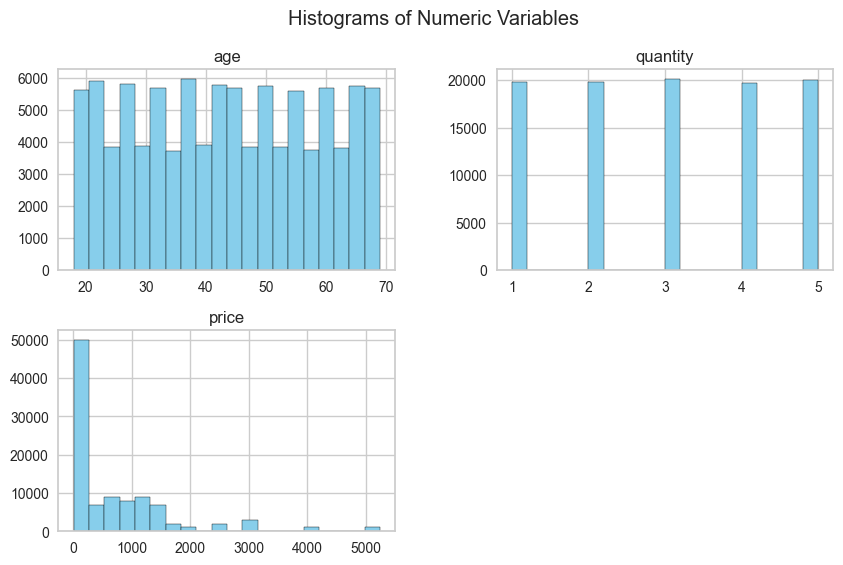

In [9]:
# Membuat histogram untuk semua kolom numerik
df_numeric.hist(bins=20, figsize=(10, 6), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numeric Variables')
plt.show()

### Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

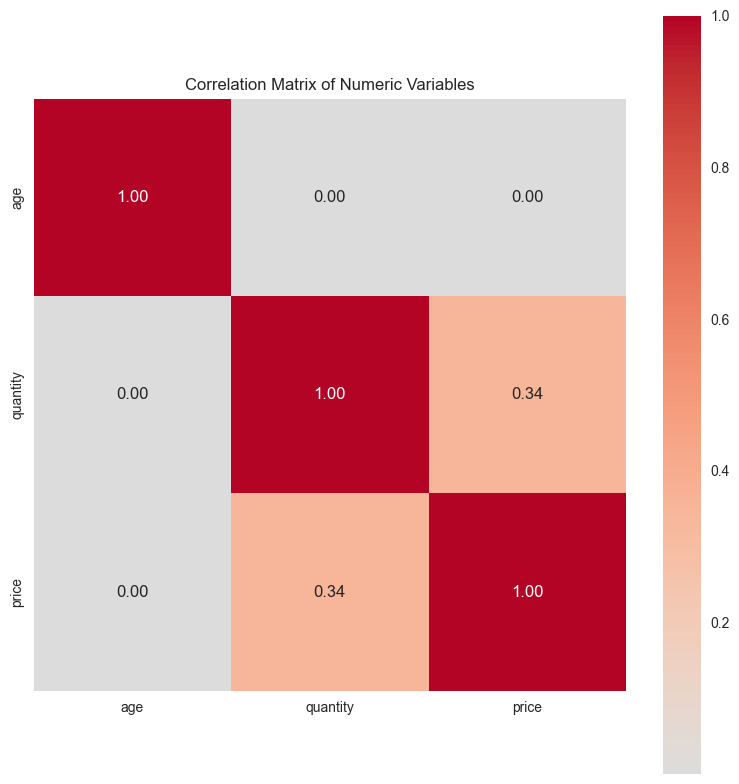


Correlation Matrix:
          age  quantity  price
age       1.0      0.00   0.00
quantity  0.0      1.00   0.34
price     0.0      0.34   1.00


In [10]:
# Select only numerical columns for correlation
correlation_matrix = df[numeric_columns].corr()

# Create correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, 
           annot=True,  # Show correlation values
           cmap='coolwarm',  # Color scheme: red for positive, blue for negative
           center=0,  # Set 0 as the center value for colors
           fmt='.2f',  # Format numbers to 2 decimal places
           square=True)  # Make cells square-shaped
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

# Optional: Display correlation values in table format
print("\nCorrelation Matrix:")
print(correlation_matrix.round(2))

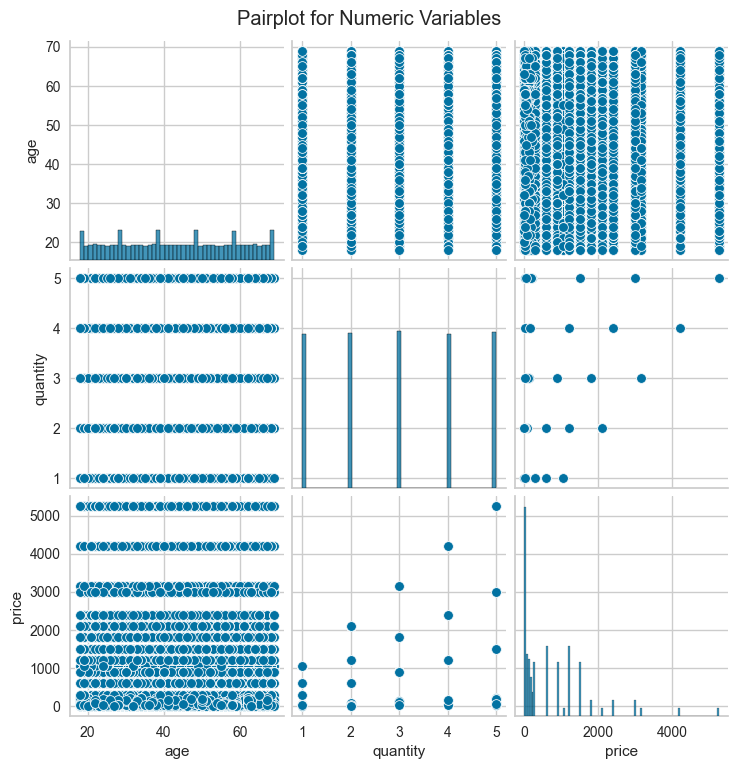

In [11]:
sns.pairplot(df)
plt.suptitle(f"Pairplot for Numeric Variables", y=1.02)  # y=1.02 to adjust title position
plt.show()

- Berdasarkan correlation matrix & pariplot di atas, tidak terdapat hubungan yang kuat antara ketiga variabel numerik.

## 4. **Visualisasi Data**  
### Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  

In [12]:
# Memilih kolom kategorikal
categoric_columns = df.select_dtypes(include=['object'])

# Statistik deskriptif untuk variabel kategorikal
for col in categoric_columns.columns:
    print(f"Descriptiive Statistics for '{col}':")
    print(df[col].describe())
    print("\n")

Descriptiive Statistics for 'invoice_no':
count       99457
unique      99457
top       I232867
freq            1
Name: invoice_no, dtype: object


Descriptiive Statistics for 'customer_id':
count       99457
unique      99457
top       C273973
freq            1
Name: customer_id, dtype: object


Descriptiive Statistics for 'gender':
count      99457
unique         2
top       Female
freq       59482
Name: gender, dtype: object


Descriptiive Statistics for 'category':
count        99457
unique           8
top       Clothing
freq         34487
Name: category, dtype: object


Descriptiive Statistics for 'payment_method':
count     99457
unique        3
top        Cash
freq      44447
Name: payment_method, dtype: object


Descriptiive Statistics for 'invoice_date':
count          99457
unique           797
top       24/11/2021
freq             159
Name: invoice_date, dtype: object


Descriptiive Statistics for 'shopping_mall':
count                99457
unique                  10
top    

Catatan:
- count: banyaknya nilai/baris/item data
- unique: jumlah nilai unik
- top: nilai yang paling sering muncul atau memiliki frekuensi tertinggi (modus)
- freq: jumlah kemunculan nilai top/mode/modus

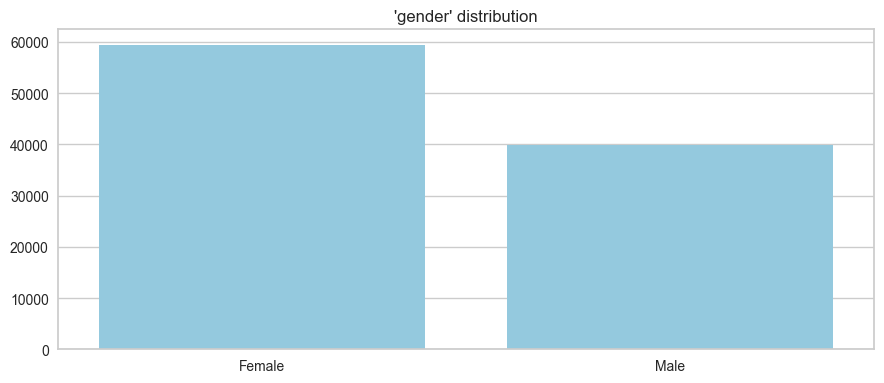

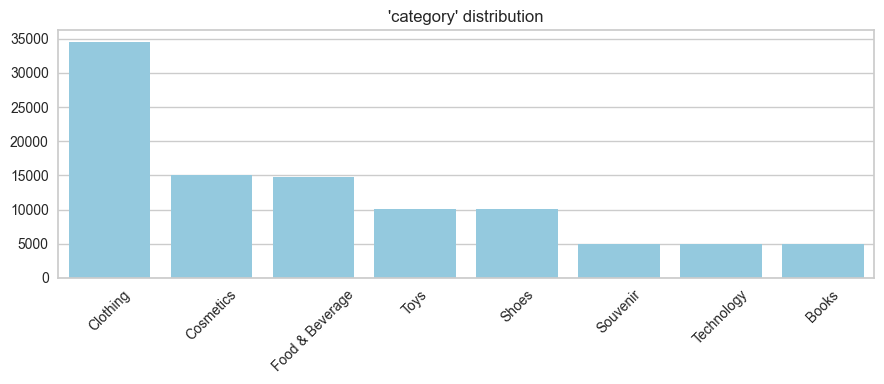

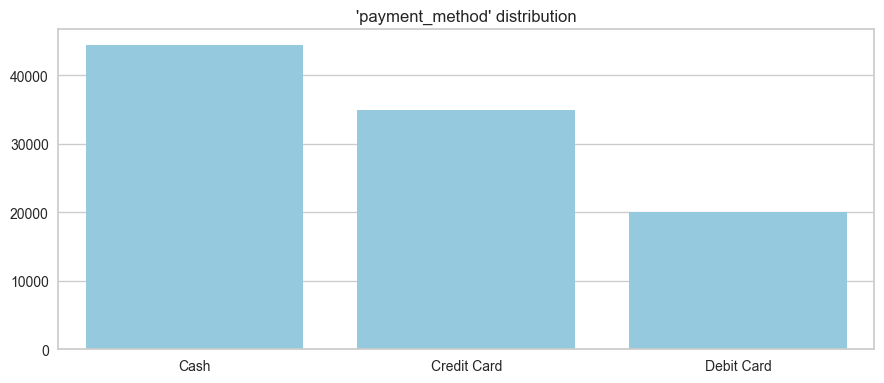

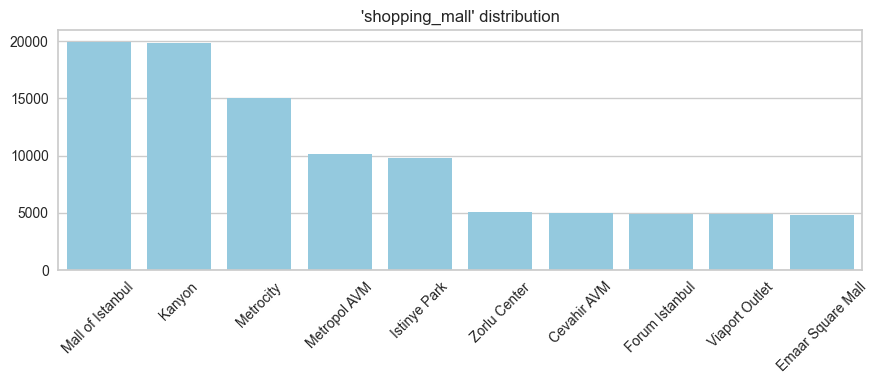

In [13]:
categoric_columns_to_visualize = ['gender', 'category', 'payment_method', 'shopping_mall']

# Visualisasi distribusi kategori dengan countplot
for col in categoric_columns_to_visualize:
    plt.figure(figsize=(9, 4))
    # Using hue=col and legend=False instead of direct palette assignment
    sns.countplot(data=df, 
                 x=col,
                 color='skyblue',  # Set single color to light blue
                 order=df[col].value_counts().index,
                 legend=False)  # Hide the legend
    plt.title(f"'{col}' distribution")
    plt.ylabel('')
    plt.xlabel('')
    # Set rotation only for category and shopping_mall
    if col in ['category', 'shopping_mall']:
        plt.xticks(rotation=45)
    else:
        plt.xticks(rotation=0)
    plt.tight_layout()  # Added to prevent label cutoff
    plt.show()

- Lebih banyak customer perempuan daripada laki-laki dengan perbandingan kurang lebih 3:2
- Kategori pakaian (clothing) mendominasi total transaksi sebanyak kurang lebih 35%
- Metode pembayaran terdiri dari cash, credit card, & debit card
- Metode pembayaran yang paling sering digunakan adalah cash (sekitar 42%)
- Retail dengan transaksi tertinggi adalah Mall of Istanbul dan Kanyon dengan total transaksi mendekati masing-masing 20,000

### Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

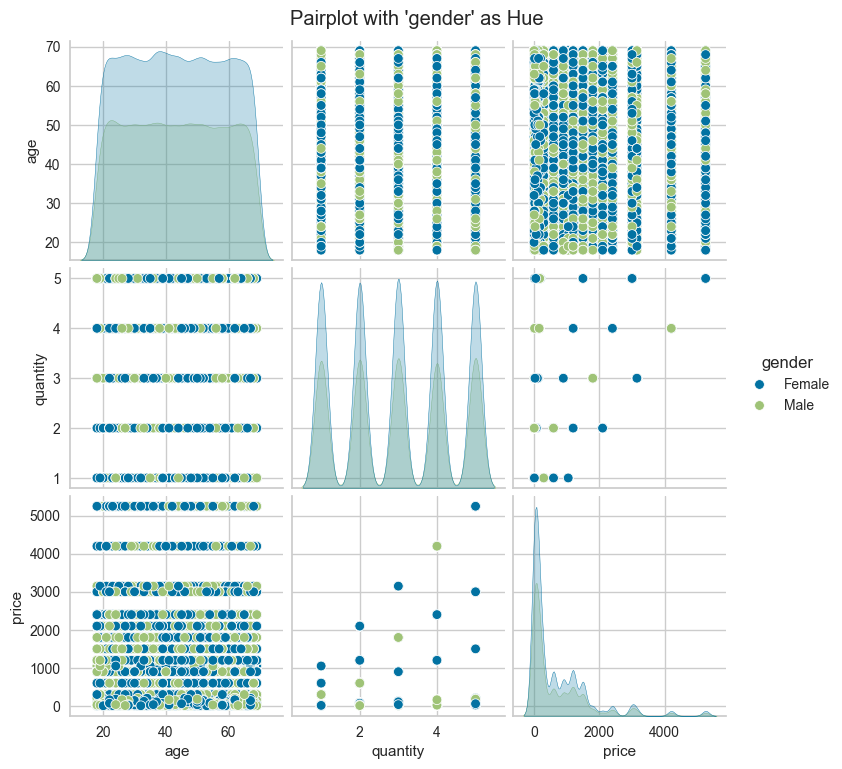

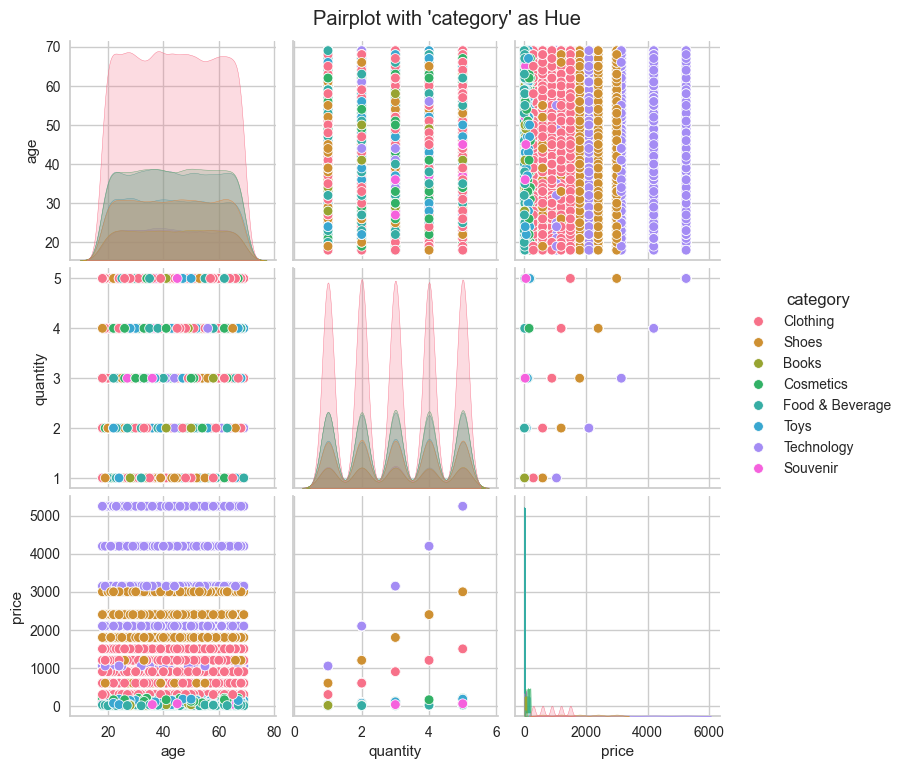

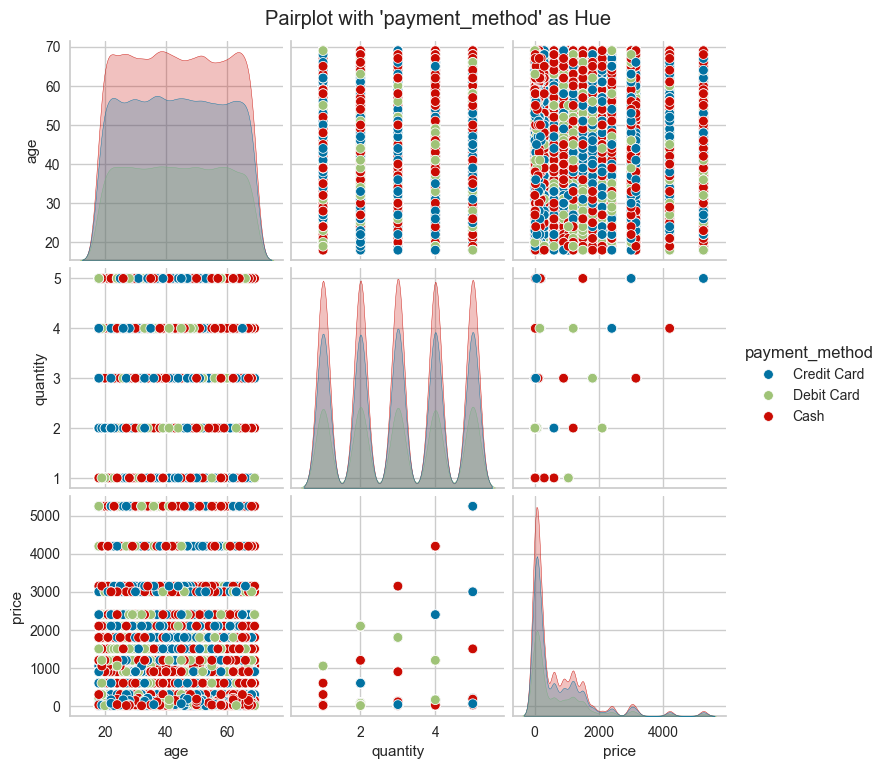

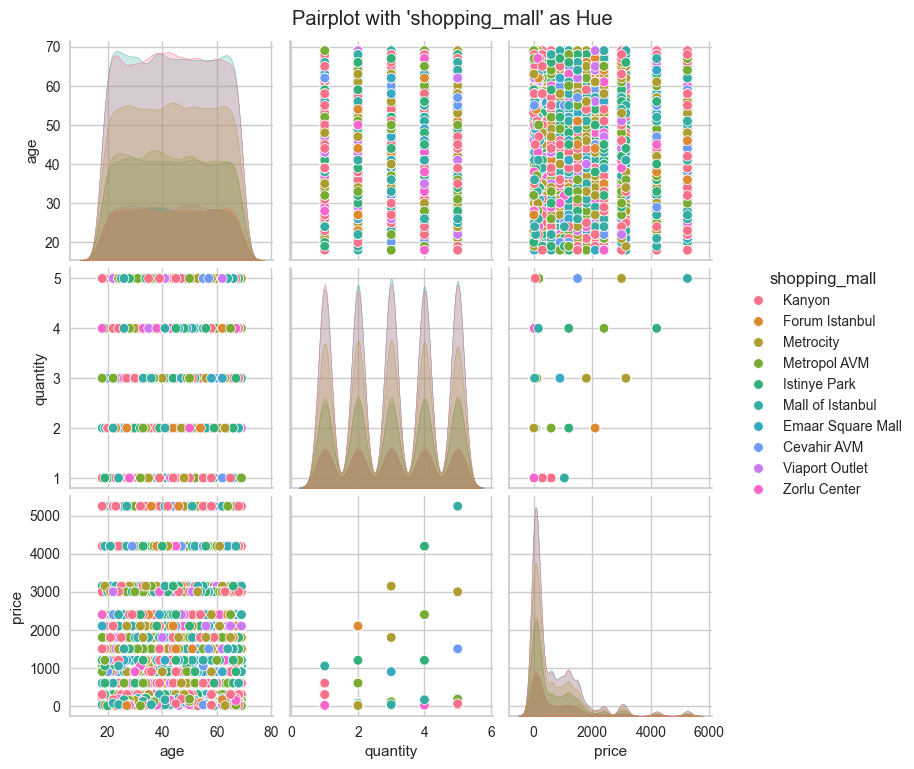

In [14]:
# Create pairplot each categorical column
for col in categoric_columns_to_visualize:
    sns.pairplot(df, hue=col, vars=numeric_columns, height=2.5)
    plt.suptitle(f"Pairplot with '{col}' as Hue", y=1.02)  # y=1.02 to adjust title position
    plt.show()

- Secara keseluruhan, belum terlihat pola yang jelas terkait hubungan antar variabel dari pairplot di atas

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values) -> tidak terdapat missing values
2. Menghapus Data Duplikat -> tidak terdapat data duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## Menghapus Data Duplikat

In [15]:
# Check for duplicates in the entire DataFrame
duplicates = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


- Tidak terdapat data duplikat

## Deteksi dan Penanganan Outlier

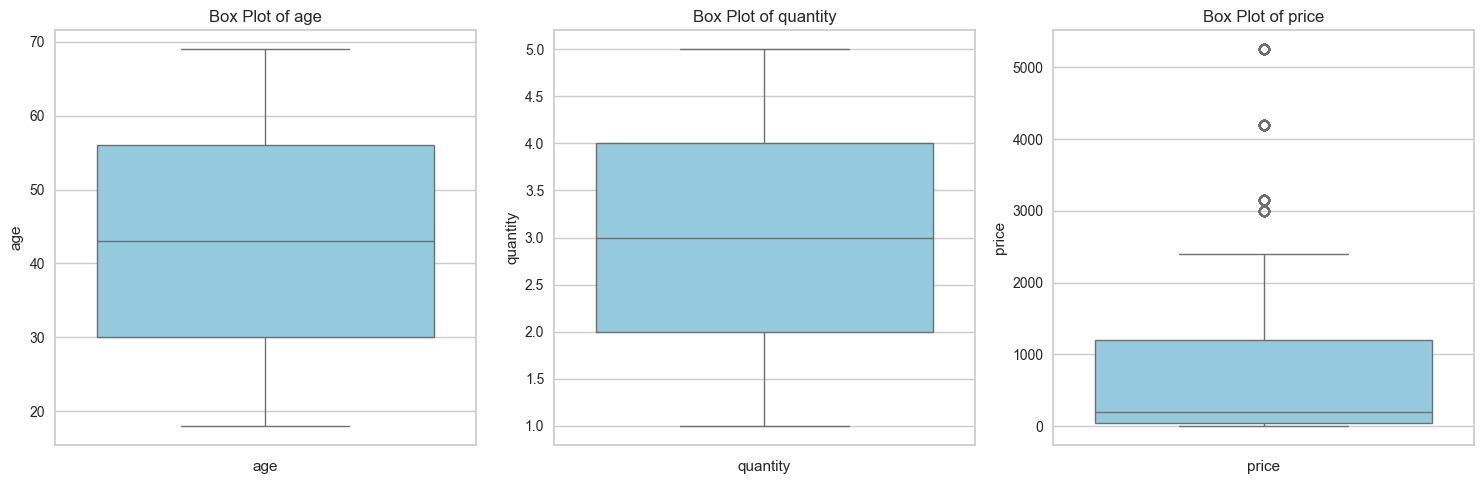

In [16]:
# Set the figure size for Boxplots
plt.figure(figsize=(15, 5))

# Loop through each numerical column
for i, col in enumerate(numeric_columns):
    plt.subplot(1, 3, i + 1)  # Create a subplot for each box plot in 1 row and 3 columns
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

- Berdasarkan boxplot di atas, terlihat ada outliers di variabel `price`, mari kita periksa.

In [17]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier conditions
outlier_condition = (df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))

# Get the outliers
outliers = df[outlier_condition]

# Display the outliers
print("Outliers in 'price':")
print(outliers[['price', 'category']])  # Adjust the columns as needed to see more information

Outliers in 'price':
         price    category
3      3000.85       Shoes
15     3000.85       Shoes
23     5250.00  Technology
53     4200.00  Technology
69     5250.00  Technology
...        ...         ...
99332  3000.85       Shoes
99374  3150.00  Technology
99387  3150.00  Technology
99424  3150.00  Technology
99455  4200.00  Technology

[5024 rows x 2 columns]


- Kita tidak perlu menghapus outliers ini karena masih wajar (tidak terindikasi human error / system error).

## Binning (Pengolompokan Data)

In [18]:
df['age'].describe()

count    99457.000000
mean        43.427089
std         14.990054
min         18.000000
25%         30.000000
50%         43.000000
75%         56.000000
max         69.000000
Name: age, dtype: float64

In [19]:
df_bin = df.copy()

# Define bins based on quartiles and additional ranges
bins = [17, 30, 43, 56, 69]  # 17 is below the minimum age (18), can be adjusted
labels = ['18-30', '31-43', '44-56', '57-69']

# Create a new column 'age_bins' to hold the binned data
df_bin['age_groups'] = pd.cut(df_bin['age'], bins=bins, labels=labels, right=True)

# Display the binned data
df_bin['age_groups'].value_counts()

age_groups
31-43    25050
18-30    25024
44-56    24712
57-69    24671
Name: count, dtype: int64

In [20]:
# Drop the 'age' column from df_bin
df_bin = df_bin.drop(columns=['age'])
df_bin.head()

,invoice_no,customer_id,gender,category,quantity,price,payment_method,invoice_date,shopping_mall,age_groups
0,I138884,C241288,Female,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,18-30
1,I317333,C111565,Male,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,18-30
2,I127801,C266599,Male,Clothing,1,300.08,Cash,9/11/2021,Metrocity,18-30
3,I173702,C988172,Female,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,57-69
4,I337046,C189076,Female,Books,4,60.60,Cash,24/10/2021,Kanyon,44-56


In [21]:
# Assign new categoric columns
categoric_columns_new = categoric_columns_to_visualize + ["age_groups"]
categoric_columns_new

['gender', 'category', 'payment_method', 'shopping_mall', 'age_groups']

In [22]:
# Update numeric columns
df_bin_numeric = df_bin.select_dtypes(include=['number'])
numeric_columns = list(df_bin_numeric.columns)
numeric_columns

['quantity', 'price']

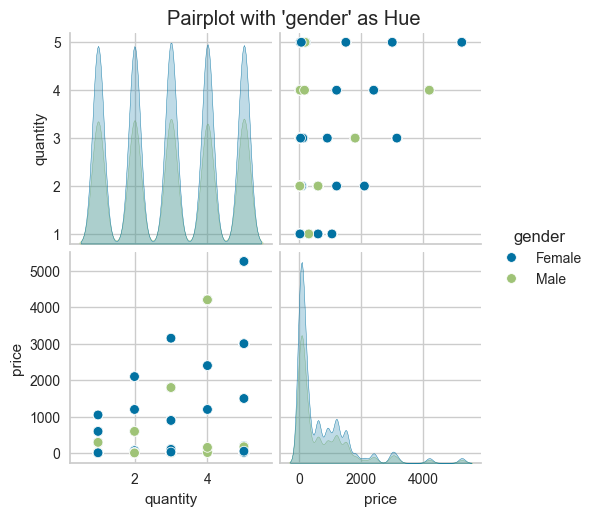

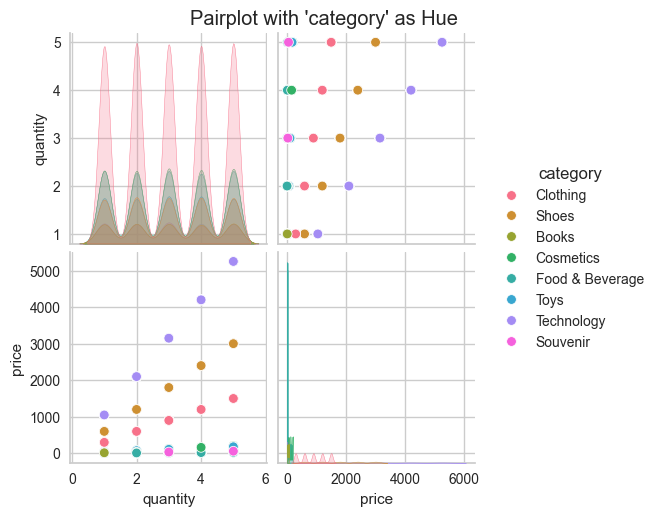

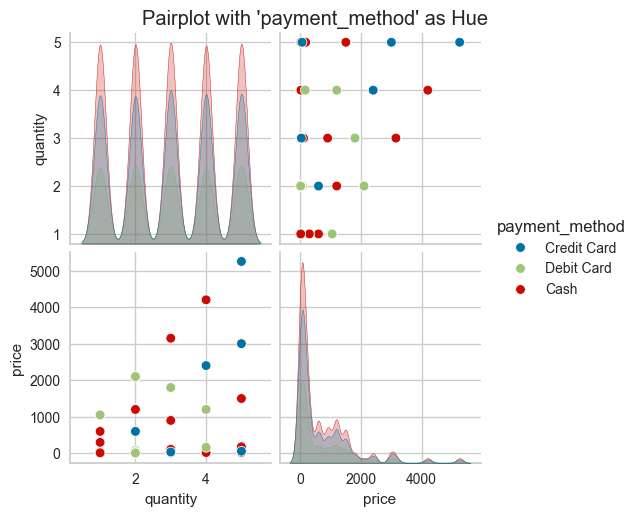

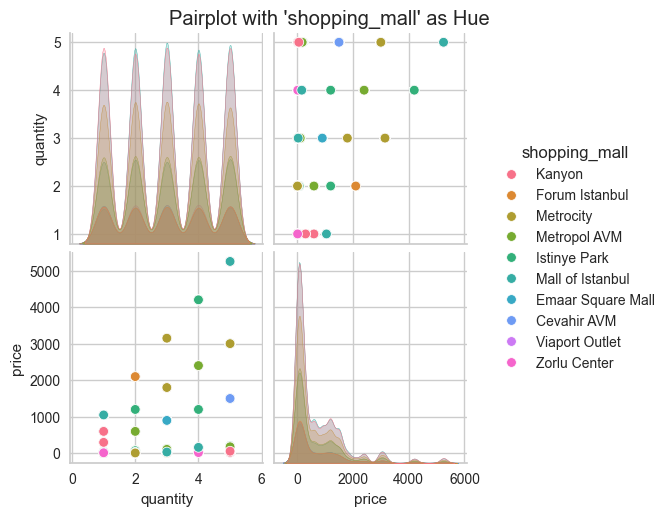

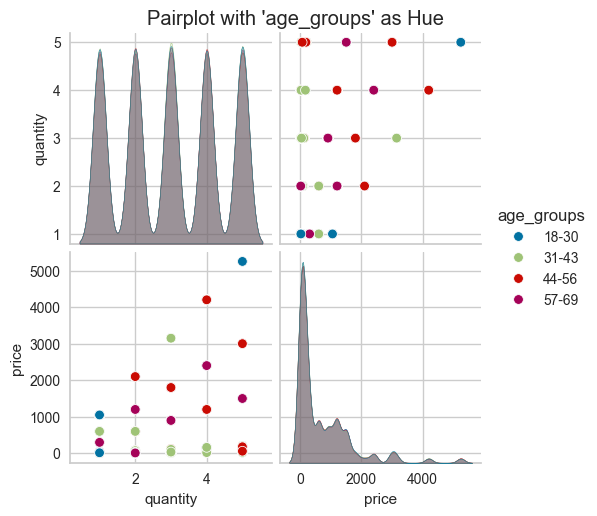

In [23]:
# Create pairplot each categorical column
for col in categoric_columns_new:
    sns.pairplot(df_bin, hue=col, vars=numeric_columns, height=2.5)
    plt.suptitle(f"Pairplot with '{col}' as Hue", y=1.02)  # y=1.02 to adjust title position
    plt.show()

## Normalisasi atau Standarisasi Fitur

In [24]:
# Initialize the MinMaxScaler
minmax_scaler = MinMaxScaler()

# Normalize the numerical columns
df_norm = df_bin.copy()
df_norm[numeric_columns] = minmax_scaler.fit_transform(df_norm[numeric_columns])

# Display the normalized DataFrame
print("Normalized DataFrame:")
df_norm.head()

Normalized DataFrame:


,invoice_no,customer_id,gender,category,quantity,price,payment_method,invoice_date,shopping_mall,age_groups
0,I138884,C241288,Female,Clothing,1.00,0.285078,Credit Card,5/8/2022,Kanyon,18-30
1,I317333,C111565,Male,Shoes,0.50,0.342299,Debit Card,12/12/2021,Forum Istanbul,18-30
2,I127801,C266599,Male,Clothing,0.00,0.056218,Cash,9/11/2021,Metrocity,18-30
3,I173702,C988172,Female,Shoes,1.00,0.571163,Credit Card,16/05/2021,Metropol AVM,57-69
4,I337046,C189076,Female,Books,0.75,0.010557,Cash,24/10/2021,Kanyon,44-56


In [25]:
df_norm[numeric_columns].describe()

,quantity,price
count,99457.000000,99457.000000
mean,0.500857,0.130421
std,0.353256,0.179452
min,0.000000,0.000000
25%,0.250000,0.007669
50%,0.500000,0.037765
75%,0.750000,0.227863
max,1.000000,1.000000


- `df_normalized` berisi dataframe dengan kolom variabel numerik yang sudah dinormalisasi dengan MinMaxScaler
- Normalisasi MinMaxScaler dipilih karena dapat mengubah data ke dalam rentang [0, 1], mencegah dominasi fitur dengan skala besar, dan mempercepat konvergensi algoritma seperti KMeans.

## Encoding Data Kategorikal

In [26]:
# Initialize label encoder
label_encoder = LabelEncoder()

df_encoded = df_norm.copy()

# Encode 'gender' using label encoding
df_encoded['gender'] = label_encoder.fit_transform(df['gender'])

# Encode 'category', 'payment_method', and 'shopping_mall' using one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=categoric_columns_new, drop_first=True)

# Display the encoded DataFrame
print("Encoded DataFrame:")
df_encoded.head()

Encoded DataFrame:


,invoice_no,customer_id,quantity,price,invoice_date,gender_1,category_Clothing,category_Cosmetics,category_Food & Beverage,category_Shoes,...,shopping_mall_Istinye Park,shopping_mall_Kanyon,shopping_mall_Mall of Istanbul,shopping_mall_Metrocity,shopping_mall_Metropol AVM,shopping_mall_Viaport Outlet,shopping_mall_Zorlu Center,age_groups_31-43,age_groups_44-56,age_groups_57-69
0,I138884,C241288,1.00,0.285078,5/8/2022,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,I317333,C111565,0.50,0.342299,12/12/2021,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,I127801,C266599,0.00,0.056218,9/11/2021,True,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,I173702,C988172,1.00,0.571163,16/05/2021,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
4,I337046,C189076,0.75,0.010557,24/10/2021,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


- Label encoding dipilih untuk `gender` karena hanya ada male & female sehingga cocok untuk diberi label 0 & 1.
- One Hot encoding dipilih untuk 'category', 'payment_method', and 'shopping_mall' karena nilai unik dari ketiga kolom ini relatif sedikit sehingga tidak hopefully tidak akan menimbulkan masalah dimensi fitur yang terlalu banyak

## Initial Feature Selection

In [27]:
initial_features = df_encoded.columns
# Ensure the selected columns are numeric for clustering
X = df_encoded[initial_features].select_dtypes(include=['number']).values  # Extract only numerical features

X

array([[1.00000000e+00, 2.85078278e-01],
       [5.00000000e-01, 3.42299090e-01],
       [0.00000000e+00, 5.62179085e-02],
       ...,
       [2.50000000e-01, 9.97183861e-04],
       [7.50000000e-01, 7.99800563e-01],
       [5.00000000e-01, 5.71235726e-03]], shape=(99457, 2))

- Kita gunakan semua kolom numerik dulu untuk pemilihan fitur (X) disini ya, nanti akan kita periksa lagi di tahap optimasi

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [28]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# # Inisialisasi dan melatih model KMeans dengan jumlah cluster = 4
# kmeans = KMeans(n_clusters=4, random_state=0)
# kmeans.fit(X)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

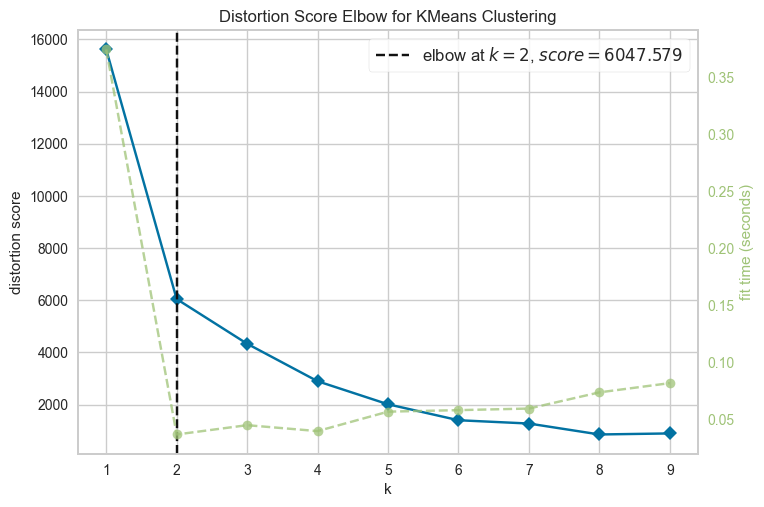

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

- Hasil analisis metode elbow menunjukkan bahwa jumlah cluster optimal adalah 2 dengan nilai total within-cluster sum of squares (WCSS) sebesar 5,995.049. Ini berarti bahwa membagi data menjadi 2 cluster memberikan keseimbangan terbaik antara meminimalkan jarak di dalam cluster dan memaksimalkan jarak antar cluster.

In [30]:
# Fit KMeans model
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Get cluster labels
labels = kmeans.labels_

# Calculate silhouette score
score = silhouette_score(X, labels)

# Display the silhouette score
print(f'Silhouette Score: {score}')

Silhouette Score: 0.5201714151809588


- Hasil initial cluster ini masih perlu dioptimasi menggunakan feature selection

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, **bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection**.

### Feature Extraction: recency_days

In [31]:
df_encoded.columns

Index(['invoice_no', 'customer_id', 'quantity', 'price', 'invoice_date',
       'gender_1', 'category_Clothing', 'category_Cosmetics',
       'category_Food & Beverage', 'category_Shoes', 'category_Souvenir',
       'category_Technology', 'category_Toys', 'payment_method_Credit Card',
       'payment_method_Debit Card', 'shopping_mall_Emaar Square Mall',
       'shopping_mall_Forum Istanbul', 'shopping_mall_Istinye Park',
       'shopping_mall_Kanyon', 'shopping_mall_Mall of Istanbul',
       'shopping_mall_Metrocity', 'shopping_mall_Metropol AVM',
       'shopping_mall_Viaport Outlet', 'shopping_mall_Zorlu Center',
       'age_groups_31-43', 'age_groups_44-56', 'age_groups_57-69'],
      dtype='object')

In [32]:
df2 = df_encoded.copy()
df2['invoice_date'].head()

0      5/8/2022
1    12/12/2021
2     9/11/2021
3    16/05/2021
4    24/10/2021
Name: invoice_date, dtype: object

In [33]:
# Convert 'invoice_date' to datetime
df2['invoice_date'] = pd.to_datetime(df2['invoice_date'], format='%d/%m/%Y')
df2['invoice_date'].describe()

count                         99457
mean     2022-02-04 02:46:59.783424
min             2021-01-01 00:00:00
25%             2021-07-19 00:00:00
50%             2022-02-05 00:00:00
75%             2022-08-22 00:00:00
max             2023-03-08 00:00:00
Name: invoice_date, dtype: object

In [34]:
# Reference date: January 1, 2024
reference_date = pd.to_datetime('2024-01-01')

# Calculate recency_days
df2['recency_days'] = (reference_date - df2['invoice_date']).dt.days
df2['recency_days'].describe()

count    99457.000000
mean       695.884030
std        229.871351
min        299.000000
25%        497.000000
50%        695.000000
75%        896.000000
max       1095.000000
Name: recency_days, dtype: float64

In [35]:
# Normalize 'recency_days'
scaler = MinMaxScaler()
df2['recency_days_norm'] = scaler.fit_transform(df2[['recency_days']])

df2 = df2.drop(columns=['invoice_date', 'recency_days'])

In [36]:
df2['recency_days_norm'].describe()

count    99457.000000
mean         0.498598
std          0.288783
min          0.000000
25%          0.248744
50%          0.497487
75%          0.750000
max          1.000000
Name: recency_days_norm, dtype: float64

### Pairplot Optimized Features

In [37]:
# Update numeric columns
df2_numeric = df2.select_dtypes(include=['number'])
numeric_columns = list(df2_numeric.columns)
numeric_columns

['quantity', 'price', 'recency_days_norm']

### Retrain Optimezed Model with Extra Feature

In [38]:
optimized_features = df2.columns
# Ensure the selected columns are numeric for clustering
X1 = df2[optimized_features].select_dtypes(include=['number']).values  # Extract only numerical features

X1

array([[1.00000000e+00, 2.85078278e-01, 2.70100503e-01],
       [5.00000000e-01, 3.42299090e-01, 5.66582915e-01],
       [0.00000000e+00, 5.62179085e-02, 6.08040201e-01],
       ...,
       [2.50000000e-01, 9.97183861e-04, 8.91959799e-01],
       [7.50000000e-01, 7.99800563e-01, 9.07035176e-01],
       [5.00000000e-01, 5.71235726e-03, 1.80904523e-01]], shape=(99457, 3))

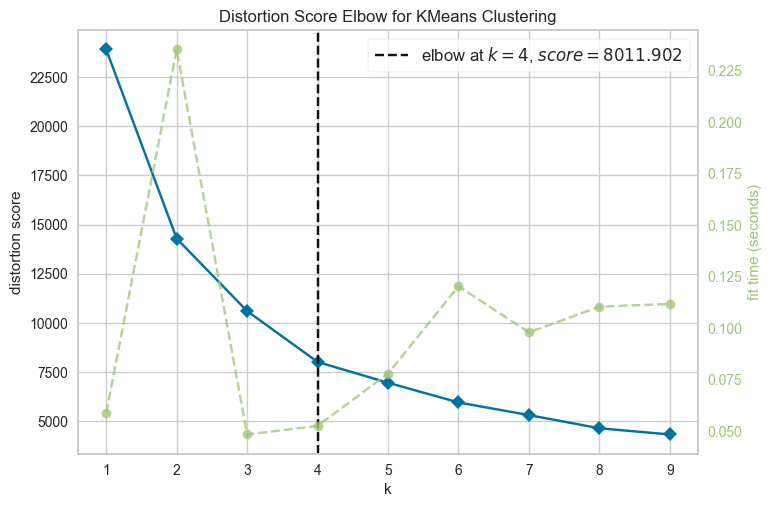

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
kmeans_1 = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans_1, k=(1, 10))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X1)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [40]:
# Fit KMeans model
k = 4
kmeans_1 = KMeans(n_clusters=k, random_state=42)
kmeans_1.fit(X1)

# Get cluster labels
labels = kmeans.labels_

# Calculate silhouette score
score = silhouette_score(X1, labels)

# Display the silhouette score
print(f'Silhouette Score: {score}')

Silhouette Score: 0.3493163825349872


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [41]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [42]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.